# Clasificador paisajes
Para este ejercicio vas a crear un clasificador automático de paisajes. Los datos los encontrarás en el Classroom como `seg_train.zip` y `seg_test.zip`. Se pide:
1. Cargar las imágenes. Mira cómo están almacenados los datos. Tendrás que recorrer las carpetas, cargar las imágenes en memoria y etiquetarlas con los nombres de las carpetas. Realiza un reshape de cada imagen (comienza el ejercicio con 32x32, para ir más rápido en las ejecuciones).
2. Investiga las imágenes, comprueba con algunas muestras que has cargado bien los datos.
3. Normaliza
4. Diseña la arquitectura de la red. Recuerda que es un algiritmo de clasificación. Ojo con las dimensiones de la entrada
5. Reserva un 20% de los datos del entrenamiento para validar.
6. Representa el objeto history
7. Evalua el modelo con los datos de test
8. Representa algunos de los paisajes donde el modelo comete errores
9. Crea una matriz de confusión con los errores del modelo

**NOTA apartado 1**: para el apartado 1 tendras que recorre las carpetas/imagenes con `os.listdir()`, e ir cargando todas las imagenes como arrays de numpy

**NOTA apartado 4**: empieza con un par de capas Conv2D + MaxPooling2D con activación relu y después la fully connected layer. on softmax como ultima capa

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import cv2
from tensorflow import keras
from skimage.io import imread
import random
from keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix
from sklearn.utils import shuffle

2023-06-20 19:25:35.767720: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Ejercicio 1

In [2]:
class_names = ['mountain','street','glacier', 'buildings','sea','forest']

IMAGE_SIZE = (32,32)

In [3]:
class_names_label = {class_name:i for i ,class_name in enumerate(class_names)}
class_names_label

{'mountain': 0,
 'street': 1,
 'glacier': 2,
 'buildings': 3,
 'sea': 4,
 'forest': 5}

In [4]:
def obtain_data(path, class_names, image_size):
    class_names_label = {class_name:i for i ,class_name in enumerate(class_names)}
    images = []
    labels = []
    X = []
    Y = []
    for dir in os.listdir(path):
        for img in os.listdir(path+'/'+dir):
            labels.append(dir)
            images.append(img)
            Y.append(class_names_label[dir])
            image = cv2.imread(path+'/'+dir+'/'+img)
            image_resize = cv2.resize(image, image_size)
            X.append(image_resize)
    df = pd.DataFrame({'image': images, 'label': labels})
    return df, np.array(X), np.array(Y)


In [5]:
df_train, X_train, Y_train = obtain_data("data/train", class_names, IMAGE_SIZE)
df_test, X_test, Y_test = obtain_data("data/test", class_names, IMAGE_SIZE)

In [6]:
df_train

,image,label
0,5109.jpg,forest
1,14621.jpg,forest
2,6366.jpg,forest
3,4565.jpg,forest
4,17472.jpg,forest
...,...,...
14029,9058.jpg,sea
14030,12249.jpg,sea
14031,17331.jpg,sea
14032,11026.jpg,sea


In [7]:
X_train.shape

(14034, 32, 32, 3)

In [8]:
Y_train.shape

(14034,)

# Ejercicio 2

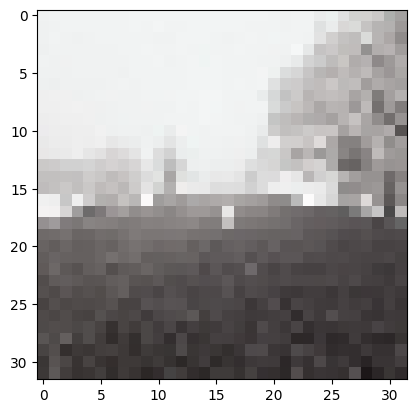

In [9]:
plt.imshow(X_train[8000]);

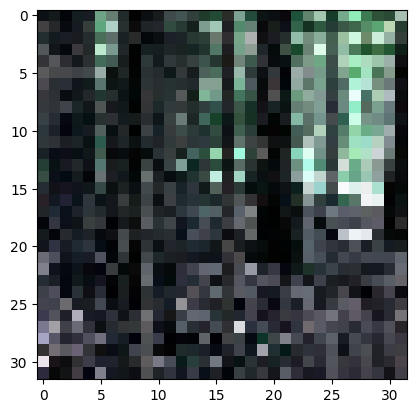

In [10]:
plt.imshow(X_train[1044]);

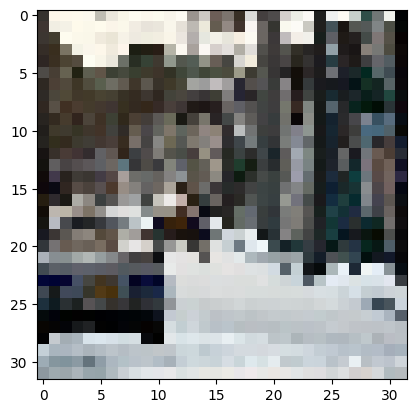

In [11]:
plt.imshow(X_test[1500]);

In [12]:
Y_train[1000]

5

In [13]:
X_train, Y_train = shuffle(X_train, Y_train, random_state=42)

# Ejercicio 3

In [14]:
X_train = X_train / 255.0
X_test = X_test / 255.0

print("Min:", np.min(X_train))
print("Max:", np.max(X_train))

Min: 0.0
Max: 1.0


# Ejercicio 4

In [15]:
layers = [
    keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(32,32,3)),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    
    keras.layers.Conv2D(128, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),

    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(units=6, activation='softmax')
]

model = keras.models.Sequential(layers)

model.compile(optimizer = "adam",
             loss = "sparse_categorical_crossentropy",
             metrics = ["accuracy"])

earlystop = EarlyStopping(patience=5)

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 128)        0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 128)               5

# Ejercicio 5

In [17]:
history = model.fit(X_train,
         Y_train,
         epochs = 50,
         batch_size = 32,
         callbacks = [earlystop],
         validation_split = 0.2)

Epoch 1/50
351/351 [==============================] - 23s 62ms/step - loss: 1.0792 - accuracy: 0.5796 - val_loss: 0.9314 - val_accuracy: 0.6491
Epoch 2/50
351/351 [==============================] - 20s 57ms/step - loss: 0.8008 - accuracy: 0.7047 - val_loss: 0.7659 - val_accuracy: 0.7175
Epoch 3/50
351/351 [==============================] - 21s 60ms/step - loss: 0.6868 - accuracy: 0.7486 - val_loss: 0.6827 - val_accuracy: 0.7439
Epoch 4/50
351/351 [==============================] - 21s 59ms/step - loss: 0.6091 - accuracy: 0.7822 - val_loss: 0.6935 - val_accuracy: 0.7357
Epoch 5/50
351/351 [==============================] - 21s 59ms/step - loss: 0.5493 - accuracy: 0.8020 - val_loss: 0.6296 - val_accuracy: 0.7659
Epoch 6/50
351/351 [==============================] - 21s 59ms/step - loss: 0.4785 - accuracy: 0.8284 - val_loss: 0.6145 - val_accuracy: 0.7873
Epoch 7/50
351/351 [==============================] - 21s 59ms/step - loss: 0.4086 - accuracy: 0.8530 - val_loss: 0.6113 - val_accuracy:

# Ejercicio 6

In [18]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,1.079165,0.579585,0.931410,0.649092
1,0.800834,0.704730,0.765909,0.717492
2,0.686784,0.748642,0.682685,0.743855
3,0.609103,0.782221,0.693481,0.735661
4,0.549348,0.801995,0.629564,0.765942
5,0.478506,0.828360,0.614480,0.787317
6,0.408589,0.853033,0.611260,0.786249
7,0.326944,0.888661,0.720892,0.762736
8,0.268799,0.903714,0.688110,0.778767
9,0.215441,0.925448,0.859363,0.751692


# Ejercicio 7

In [19]:
results = model.evaluate(X_test, Y_test)
results

94/94 [==============================] - 1s 12ms/step - loss: 1.0036 - accuracy: 0.7443


[1.0036251544952393, 0.7443333268165588]

In [20]:
prediction_prob = model.predict(X_test)
pd.DataFrame(prediction_prob)

94/94 [==============================] - 1s 12ms/step


,0,1,2,3,4,5
0,8.139170e-08,5.074472e-07,3.118164e-08,6.693768e-09,1.464737e-10,9.999993e-01
1,1.535120e-10,3.115566e-09,9.405869e-06,6.096607e-10,1.165723e-08,9.999905e-01
2,7.039527e-08,3.405968e-05,5.477025e-05,7.404469e-06,1.642915e-06,9.999020e-01
3,1.310295e-05,6.209950e-05,1.740480e-05,1.769403e-03,8.690587e-06,9.981293e-01
4,1.393179e-07,6.183399e-08,3.801079e-05,2.183616e-06,9.091635e-08,9.999594e-01
...,...,...,...,...,...,...
2995,2.168883e-04,1.529977e-02,1.526298e-01,1.206785e-01,7.111722e-01,3.026065e-06
2996,2.109194e-03,3.652816e-03,1.366483e-02,6.229616e-05,9.798945e-01,6.162827e-04
2997,5.750601e-06,2.707913e-04,3.018679e-03,1.181500e-06,9.967036e-01,1.348131e-08
2998,1.063077e-02,3.047300e-03,6.914932e-02,3.496308e-04,9.168211e-01,1.805473e-06


In [21]:
prediction = np.argmax(prediction_prob, axis=1)

In [22]:
np.unique(prediction, return_counts = True)

(array([0, 1, 2, 3, 4, 5]), array([550, 639, 498, 299, 565, 449]))

In [23]:
np.unique(Y_test, return_counts = True)

(array([0, 1, 2, 3, 4, 5]), array([525, 501, 553, 437, 510, 474]))

# Ejercicio 8

In [24]:
def buscar_clave(valor):
    for clave, v in class_names_label.items():
        if v == valor:
            return clave

Clase predicha: buildings
Clase real: forest


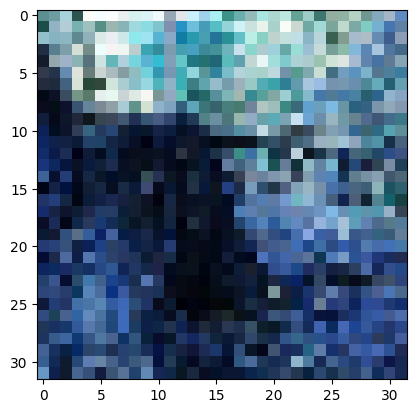

Clase predicha: street
Clase real: forest


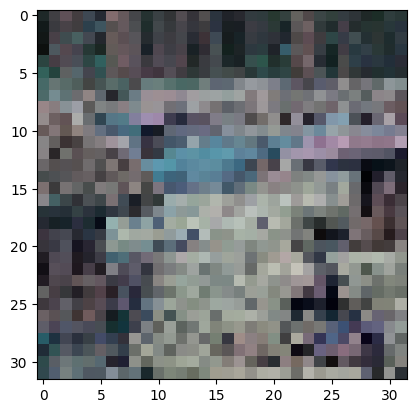

Clase predicha: street
Clase real: forest


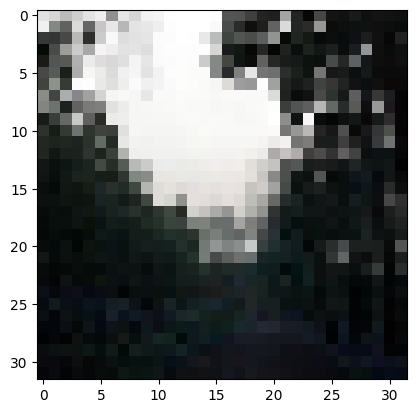

Clase predicha: sea
Clase real: forest


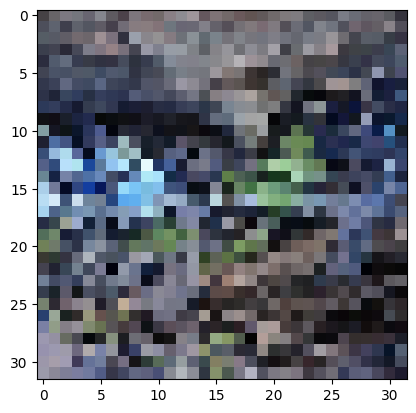

Clase predicha: street
Clase real: forest


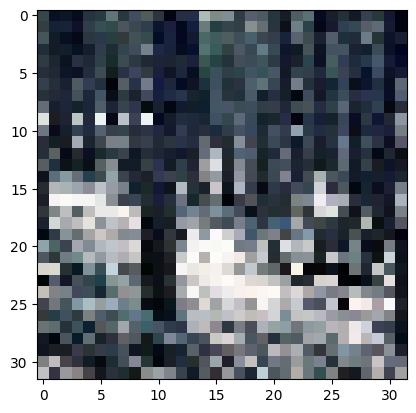

In [25]:
incorrect_predictions = np.nonzero(prediction != Y_test)[0]
for i in range(5):
    plt.imshow(X_test[incorrect_predictions[i]])
    print(f"Clase predicha: {buscar_clave(prediction[incorrect_predictions[i]])}")
    print(f"Clase real: {buscar_clave(Y_test[incorrect_predictions[i]])}")
    plt.show()

# Ejercicio 9

In [26]:
confusion_matrix(Y_test, prediction)

array([[399,   7,  56,   9,  50,   4],
       [  4, 428,  10,  32,  16,  11],
       [ 93,  23, 367,  12,  57,   1],
       [ 22, 126,  15, 222,  36,  16],
       [ 28,  15,  46,  17, 402,   2],
       [  4,  40,   4,   7,   4, 415]])